# Etude photos par séquences

In [1]:
from fastai.vision import *

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, roc_curve, RocCurveDisplay

In [21]:
from sklearn.metrics import plot_roc_curve

In [22]:
from sklearn.metrics import confusion_matrix

In [5]:
class ArrayImageList(ImageList):
    @classmethod
    def from_numpy(cls, numpy_array):
        return cls(items=range(len(numpy_array)),inner_df=numpy_array)
    
    def label_from_array(self, array, label_cls=None, **kwargs):
        return self._label_from_list(array[self.items.astype(np.int)],label_cls=label_cls,**kwargs)
    
    def get(self, i):
        n = self.inner_df[i]
        n = torch.tensor(n).float()
        return Image(n)
    
    def reconstruct(self, t:Tensor):
        return Image(t)

In [4]:
path = Path('./')

# Importation du modèle développé (export.pkl dans le dossier courant)

In [5]:
learn = load_learner('./')

In [7]:
df_test = pd.read_csv('../test_date.csv')

In [8]:
df_test.head()

Unnamed: 0  num                                               Path label  \
0           0    0  ./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-20...  ours   
1           1    1  ./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-20...  ours   
2           2    2  ./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-20...  ours   
3           3    3  ./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-20...  ours   
4           4    4  ./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-20...  ours   

              datetime  Month  Year                    date  Sequence  
0  2019-04-10 03:12:09      4  2019  2019-12-04/10/19 03:12         0  
1  2019-04-10 03:12:07      4  2019  2019-12-04/10/19 03:12         0  
2  2019-04-10 03:12:11      4  2019  2019-12-04/10/19 03:12         0  
3  2019-04-10 03:12:09      4  2019  2019-12-04/10/19 03:12         0  
4  2019-04-10 03:12:10      4  2019  2019-12-04/10/19 03:12         0

In [8]:
dataset_test = np.load('../test_float.npy')

In [9]:
dataset_test = np.transpose(dataset_test[:len(dataset_test), :,:, :], (0, 3, 1, 2))

In [9]:
df_test['y_true'] = df_test['label'].map({'ours': 1, 'autres': 0})

In [10]:
#prendre [0] pour voir si on
# essayer first comme fonction d'aggrégation
y_true_seq = df_test.groupby('Sequence')['y_true'].mean()

In [11]:
y_true_seq = y_true_seq.astype(int)

In [23]:
y_true_seq 

Sequence
0       1
1       1
2       1
3       1
4       1
       ..
4328    0
4329    0
4330    0
4331    0
4332    0
Name: y_true, Length: 4333, dtype: int64

# Study of a predefined unique sequence

In [28]:
seq = int(input(' Sequence number smaller than ' + str(df_test['Sequence'].nunique()) + ' : ' ))

 Sequence number smaller than 4333 : 0


In [29]:
sequence_seq_num = list(df_test[df_test['Sequence'] == seq]['num'])
sequence_seq = list(df_test[df_test['Sequence'] == seq]['Path'])

In [30]:
sequence_seq_num

[0, 1, 2, 3, 4]

In [31]:
for image in sequence_seq: 
    print(image)

./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-2019/Ours indeterminé le 10-04-19 à 3h12/IMG_0732.JPG
./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-2019/Ours indeterminé le 10-04-19 à 3h12/IMG_0731.JPG
./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-2019/Ours indeterminé le 10-04-19 à 3h12/IMG_0735.JPG
./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-2019/Ours indeterminé le 10-04-19 à 3h12/IMG_0733.JPG
./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-2019/Ours indeterminé le 10-04-19 à 3h12/IMG_0734.JPG


### Visualisation des images

./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-2019/Ours indeterminé le 10-04-19 à 3h12/IMG_0732.JPG
./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-2019/Ours indeterminé le 10-04-19 à 3h12/IMG_0731.JPG
./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-2019/Ours indeterminé le 10-04-19 à 3h12/IMG_0735.JPG
./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-2019/Ours indeterminé le 10-04-19 à 3h12/IMG_0733.JPG
./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-2019/Ours indeterminé le 10-04-19 à 3h12/IMG_0734.JPG


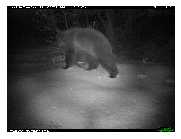

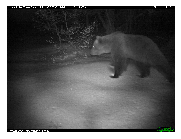

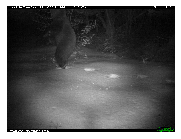

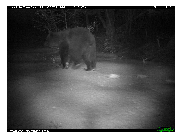

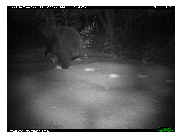

In [32]:
for image in sequence_seq:
    print(image)
    img = open_image('../' + image)
    img.show(size = (400, 400))

In [36]:
#Remember 0 is bear in fastai, 1 is other
correction = 'mean'
threshold = 0.6 #60%
test_pred_class = []
test_pred_trust_bear = []
test_pred_trust_other = []
test_pred_class_num = []

for i, image in enumerate(sequence_seq):
    #print(i, image)
    print(sequence_seq_num[i])
    test_pred_class.append(learn.predict(dataset_test[sequence_seq_num[i]])[0])
    test_pred_class_num.append(learn.predict(dataset_test[sequence_seq_num[i]])[1])
    test_pred_trust_bear.append(learn.predict(dataset_test[sequence_seq_num[i]])[2][0])
    test_pred_trust_other.append(learn.predict(dataset_test[sequence_seq_num[i]])[2][1])
    print(learn.predict(dataset_test[sequence_seq_num[i]])[0])
    
    # Correction de la prédiction (lissage avec moyenne)
    if correction == 'mean':
        pred = np.array([x for x in test_pred_trust_bear])

        x = 0 if pred.mean() > threshold else 1
        predictions_class_num_scored = [int(x)]*len(pred)
        
        
    # Correction de la prédiction
    else:
        pred = np.array([x for x in test_pred_trust_bear])
        print('pred_bear', pred, len(pred))
        if any(pred>threshold):
            print('There is a reasonable probability that there is a bear in the sequence')
            predictions_class_num_scored = np.array([1]*len(pred))
            print(predictions_class_num_scored)
        else:
            predictions_class_num_scored = test_pred_class_num
    
                  
#test_pred_class, test_pred_class_num, test_pred_trust_bear, test_pred_trust_other
print('Predictions', test_pred_class_num, 
      'Predictions corrigées', predictions_class_num_scored,
      'mean', pred.mean())

0
bear
1
bear
2
other
3
bear
4
bear
Predictions [tensor(0), tensor(0), tensor(1), tensor(0), tensor(0)] Predictions corrigées [0, 0, 0, 0, 0] mean 0.8301193


In [37]:
df_result_1seq = pd.DataFrame(pd.Series(sequence_seq), columns = ['Path'])
df_result_1seq['Predicted Class'] = pd.Series(test_pred_class)
df_result_1seq['Certainty bear'] = np.array(test_pred_trust_bear).astype(float)
df_result_1seq['Certainty other'] = np.array(test_pred_trust_other).astype(float)
df_result_1seq['Predicted Class'] = df_result_1seq['Predicted Class'].apply(lambda x: str(x))
df_result_1seq['Prediction'] = pd.Series(test_pred_class_num).apply(lambda x: int(x))
df_result_1seq['Prediction scored'] = predictions_class_num_scored
df_result_1seq

Path Predicted Class  \
0  ./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-20...            bear   
1  ./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-20...            bear   
2  ./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-20...           other   
3  ./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-20...            bear   
4  ./Faune_sauvage_2019/Fos_Canéjan/S01_17-04-20...            bear   

   Certainty bear  Certainty other  Prediction  Prediction scored  
0        0.999982         0.000018           0                  0  
1        0.767899         0.232101           0                  0  
2        0.383380         0.616620           1                  0  
3        0.999996         0.000004           0                  0  
4        0.999339         0.000661           0                  0

# Inférence sur toutes les images en Séquence

In [22]:
#seq is range(4333)
df_result = pd.DataFrame(pd.Series(sequence_seq), columns = ['Path'])
sequence = []
accuracy = []
predicted_class = []
test_predictions_class = []
test_predictions_trust = []
test_predictions_class_num = []
predictions_class_num_scored = []

n = df_test['Sequence'].nunique()
#n = 3
print(n)
for seq in range(n):
    #print('seq', seq)
    sequence_seq_num = list(df_test[df_test['Sequence'] == seq]['num'])
    sequence_seq = list(df_test[df_test['Sequence'] == seq]['Path'])

    df_result['Path'] = pd.Series(sequence_seq)

    
    for i, image in enumerate(sequence_seq):
        #print(i, image)
        #print(sequence_seq_num[i])
        test_predictions_class.append(learn.predict(dataset_test[sequence_seq_num[i]])[0])
        test_predictions_class_num.append(learn.predict(dataset_test[sequence_seq_num[i]])[1])
        test_predictions_trust.append(learn.predict(dataset_test[sequence_seq_num[i]])[2])    
        sequence.append(seq)
        accuracy.append(test_predictions_trust)
        predicted_class.append(test_predictions_class)

    
df_result = pd.DataFrame(pd.Series(sequence), columns = ['Path'])
df_result['Sequence'] = sequence
df_result['Accuracy'] = pd.Series(test_predictions_trust)
df_result['Predicted Class'] = pd.Series(test_predictions_class)
df_result['Accuracy_class_bear'] = df_result['Accuracy'].apply(lambda x : float(x[0]))
df_result['Accuracy_class_other'] = df_result['Accuracy'].apply(lambda x : float(x[1]))
df_result['Predicted Class'] = df_result['Predicted Class'].apply(lambda x: str(x))
df_result['Predicted Class num'] = df_result['Predicted Class'].map({'bear': 0, 'other': 1})


4333


In [23]:
df_result.dtypes

Path                      int64
Sequence                  int64
Accuracy                 object
Predicted Class          object
Accuracy_class_bear     float64
Accuracy_class_other    float64
Predicted Class num       int64
dtype: object

## Correction après coup avec la moyenne

In [24]:
df_result

Path  Sequence                              Accuracy Predicted Class  \
0         0         0  [tensor(1.0000), tensor(1.7883e-05)]            bear   
1         0         0      [tensor(0.7679), tensor(0.2321)]            bear   
2         0         0      [tensor(0.3834), tensor(0.6166)]           other   
3         0         0  [tensor(1.0000), tensor(4.3797e-06)]            bear   
4         0         0      [tensor(0.9993), tensor(0.0007)]            bear   
...     ...       ...                                   ...             ...   
38339  4332      4332      [tensor(0.0001), tensor(0.9999)]           other   
38340  4332      4332      [tensor(0.0004), tensor(0.9996)]           other   
38341  4332      4332      [tensor(0.0001), tensor(0.9999)]           other   
38342  4332      4332  [tensor(5.5872e-05), tensor(0.9999)]           other   
38343  4332      4332  [tensor(4.8452e-05), tensor(1.0000)]           other   

       Accuracy_class_bear  Accuracy_class_other  Predicted Class num  
0                 0.999982              0.000018                    0  
1                 0.767899              0.232101                    0  
2                 0.383380              0.616620                    1  
3                 0.999996              0.000004                    0  
4                 0.999339              0.000661                    0  
...                    ...                   ...                  ...  
38339             0.000119              0.999881                    1  
38340             0.000370              0.999630                    1  
38341             0.000144              0.999856                    1  
38342             0.000056              0.999944                    1  
38343             0.000048              0.999952                    1  

[38344 rows x 7 columns]

In [102]:
predictions_scored = np.array(df_result.groupby('Sequence')['Predicted Class num'].mean())
predictions_scored = np.round(predictions_scored)
predictions_scored.astype(int)
df_result_scored = pd.DataFrame(predictions_scored.astype(int), columns = ['Predictions lissees'])
df_result_scored['Sequence'] = df_result['Sequence'].unique()
df_result_scored['y_true'] = y_true_seq.astype(int)
df_result_scored.set_index('Sequence')

Predictions lissees  y_true
Sequence                             
0                           0       0
1                           0       0
2                           0       0
3                           0       0
4                           0       0
...                       ...     ...
4328                        1       1
4329                        1       1
4330                        1       1
4331                        1       1
4332                        1       1

[4333 rows x 2 columns]

# Matrice obtenue avec la moyenne:

Ici on prend juste la moyenne des classes prédites :

In [104]:
print(confusion_matrix(df_result_scored['y_true'], df_result_scored['Predictions lissees']))

[[  91   35]
 [ 419 3788]]


In [105]:
df_result['Sequence'].unique()

array([   0,    1,    2,    3, ..., 4329, 4330, 4331, 4332])

In [37]:
df_result = df_result.drop('Accuracy', axis = 1)

In [39]:
df_result = df_result.drop('Unnamed: 0', axis = 1)

In [26]:
df_result

Unnamed: 0  Path  Sequence                          Accuracy  \
0               0     0         0  tensor([9.9998e-01, 1.7883e-05])   
1               1     0         0          tensor([0.7679, 0.2321])   
2               2     0         0          tensor([0.3834, 0.6166])   
3               3     0         0  tensor([1.0000e+00, 4.3797e-06])   
4               4     0         0  tensor([9.9934e-01, 6.6089e-04])   
...           ...   ...       ...                               ...   
38339       38339  4332      4332  tensor([1.1865e-04, 9.9988e-01])   
38340       38340  4332      4332  tensor([3.7025e-04, 9.9963e-01])   
38341       38341  4332      4332  tensor([1.4425e-04, 9.9986e-01])   
38342       38342  4332      4332  tensor([5.5872e-05, 9.9994e-01])   
38343       38343  4332      4332  tensor([4.8452e-05, 9.9995e-01])   

       Predicted Class  Accuracy_class_bear  Accuracy_class_other  \
0                    0             0.999982              0.000018   
1                    0             0.767899              0.232101   
2                    1             0.383380              0.616620   
3                    0             0.999996              0.000004   
4                    0             0.999339              0.000661   
...                ...                  ...                   ...   
38339                1             0.000119              0.999881   
38340                1             0.000370              0.999630   
38341                1             0.000144              0.999856   
38342                1             0.000056              0.999944   
38343                1             0.000048              0.999952   

       Predicted Class num  
0                        0  
1                        0  
2                        1  
3                        0  
4                        0  
...                    ...  
38339                    1  
38340                    1  
38341                    1  
38342                    1  
38343                    1  

[38344 rows x 8 columns]

In [26]:
df_result.to_csv('df_result.csv')

In [5]:
# On peut reprendre à partir de là en lisant le fichier df_result.csv
df_result = pd.read_csv('./df_result.csv')

In [6]:
df_result.dtypes

Unnamed: 0                int64
Path                      int64
Sequence                  int64
Accuracy                 object
Predicted Class          object
Accuracy_class_bear     float64
Accuracy_class_other    float64
Predicted Class num       int64
dtype: object

In [13]:
df_result['Predicted Class'] = df_result['Predicted Class num'].apply(lambda x : int(1-x))

In [14]:
df_result.groupby('Sequence').count()['Accuracy'].values

array([5, 5, 3, ..., 2, 2, 6])

In [15]:
#threshold = 0.6
def lissage_any(test_pred_trust_bear, threshold):
    
    return any(test_pred_trust_bear>threshold)

In [16]:
#threshold = 0.6
def lissage(test_pred_trust_bear, threshold):

        pred = np.array([x for x in test_pred_trust_bear])
        x = 1 if pred.mean() > threshold else 0
        predictions_class_num_scored = [int(x)]*len(pred)
        
        return np.mean(predictions_class_num_scored)
    

ROC Curve is the plot of True Positive rate (TPR) against False Positive Rate (FPR).

TPR (recall) = TP/P = TP/(TP + FN)

FPR = FP/N = FP/(FP + TN)

                      TP   |   FP
 Confusion matrix = ---------------
                      FN   |   TN
                      
                      

In [24]:
TPR_list_sk, FPR_list_sk = [], []


def ROC_lissage(threshold):

    predictions_scored_threshold = np.array(df_result.groupby('Sequence')[['Accuracy_class_bear']]
                                            .agg(lissage, threshold))

    #cfm = confusion_matrix(y_true_seq, predictions_scored_threshold)
    #TPR = cfm[0,0]/(cfm[0,0]+cfm[1,0])
    #FPR = cfm[0,1]/(cfm[0,1]+cfm[1,1])
    
    FPR, TPR, _ = roc_curve(y_true_seq, predictions_scored_threshold)
    
    return TPR, FPR

for t in np.logspace(0.01, 0.99, 100):
    
    TPR, FPR = ROC_lissage(t)

    TPR_list_sk.append(TPR)
    FPR_list_sk.append(FPR)

In [25]:
TPR_list_any_sk, FPR_list_any_sk = [], []


def ROC_lissage(threshold):

    predictions_scored_threshold = np.array(df_result.groupby('Sequence')[['Accuracy_class_bear']]
                                            .agg(lissage_any, threshold))

    #cfm = confusion_matrix(y_true_seq, predictions_scored_threshold)
    #TPR = cfm[0,0]/(cfm[0,0]+cfm[1,0])
    #FPR = cfm[0,1]/(cfm[0,1]+cfm[1,1])
    
    FPR, TPR, _ = roc_curve(y_true_seq, predictions_scored_threshold)
    
    return TPR, FPR

for t in np.logspace(0.01, 0.99, 100):
    
    TPR, FPR = ROC_lissage(t)

    TPR_list_any_sk.append(TPR)
    FPR_list_any_sk.append(FPR)
    

In [50]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'True Positive Rate')

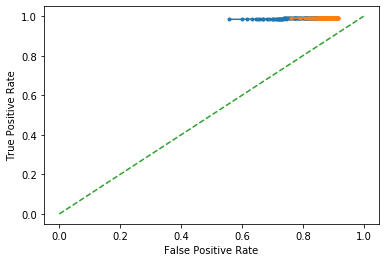

In [51]:
plt.plot(FPR_list, TPR_list, marker='.', label='Logistic')
plt.plot(FPR_list_any, TPR_list_any, marker='.', label='Logistic')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.xlim([0.4,8]) 

In [52]:
import seaborn as sns

In [53]:
data = {'TPR_list': TPR_list, 'FPR_list': FPR_list, 'TPR_list_any': TPR_list_any, 'FPR_list_any': FPR_list_any,
       'threshold': np.linspace(0.1, 0.99, 100)}
df_roc = pd.DataFrame.from_dict(data)

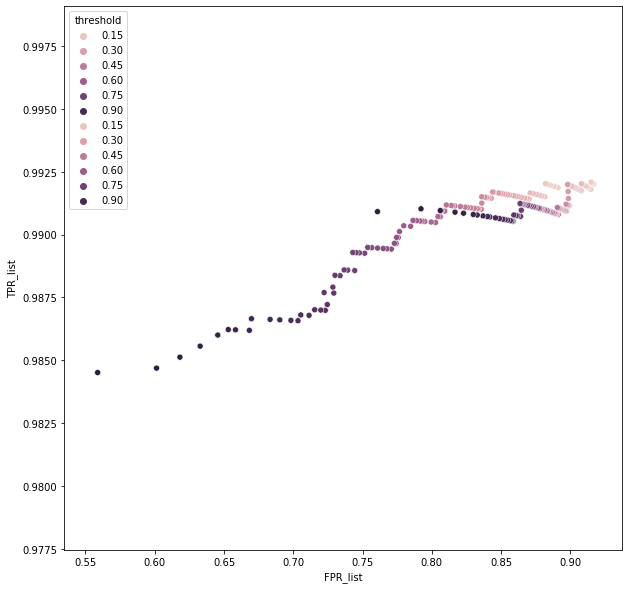

In [58]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'FPR_list', y ='TPR_list', data= df_roc, hue = 'threshold')
sns.scatterplot(x = 'FPR_list_any', y = 'TPR_list_any', data= df_roc, hue = 'threshold')

#plt.xlim([0.5,1]) 
#plt.ylim([0.5, 1])

In [91]:
data_sk = {'TPR_list_sk': TPR_list_sk, 
           'FPR_list_sk': FPR_list_sk, 
           'TPR_list_any_sk': TPR_list_any_sk, 
           'FPR_list_any_sk': FPR_list_any_sk,
       'threshold': np.linspace(0.1, 0.99, 100)}
df_roc_sk = pd.DataFrame.from_dict(data_sk)
df_roc_sk
TPR_list_sk
TPR_list_any

[0.9920102269095558,
 0.9920483460559797,
 0.9920810896420652,
 0.9918006937874487,
 0.9918495297805643,
 0.9918876755070203,
 0.9919103920348475,
 0.9919404835709857,
 0.9919901417128774,
 0.9920196439533456,
 0.9917405934536555,
 0.9917607567897467,
 0.9917883211678832,
 0.991810737033667,
 0.9918330308529946,
 0.9918552036199095,
 0.9918723660445514,
 0.9918870192307693,
 0.9919064748201439,
 0.9919258373205742,
 0.991945107398568,
 0.991971454058876,
 0.9919833729216152,
 0.9919928825622776,
 0.9917135247114531,
 0.9914378506052554,
 0.9911504424778761,
 0.9911608721272834,
 0.9911712772218952,
 0.9911842491918895,
 0.9912075029308324,
 0.9909330213512723,
 0.9909436167104879,
 0.9909568261376897,
 0.9909778812572759,
 0.9909883720930233,
 0.9910066724688135,
 0.9910222994497538,
 0.9910326873011281,
 0.9910482240831648,
 0.9910611303344867,
 0.9910765687967761,
 0.9907993099482462,
 0.9908204245553643,
 0.9908256880733946,
 0.9908335720423948,
 0.9908440629470673,
 0.9908466819221

TypeError: unhashable type: 'numpy.ndarray'

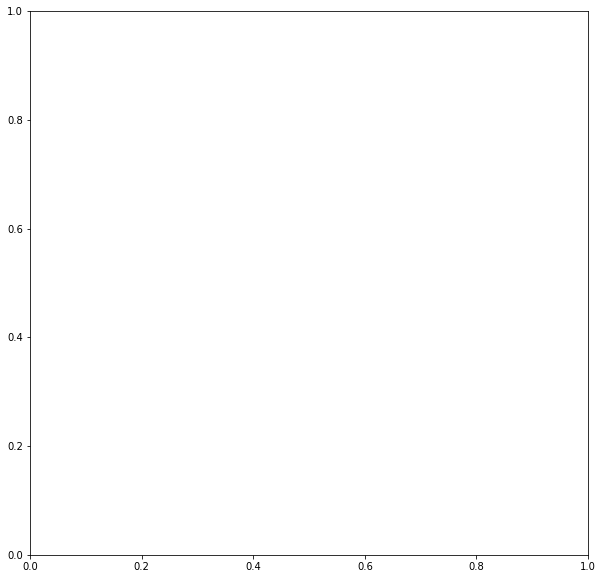

In [84]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'FPR_list_sk', y ='TPR_list_sk', data= df_roc_sk, hue = 'threshold')
sns.scatterplot(x = 'FPR_list_any_sk', y = 'TPR_list_any_sk', data= df_roc_sk, hue = 'threshold')

#plt.xlim([0.5,1]) 
#plt.ylim([0.5, 1])

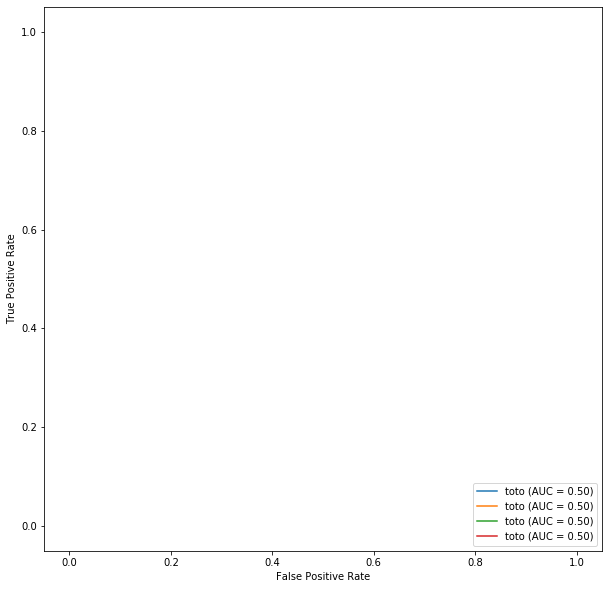

In [26]:
# courbe scikit-learn

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
#plt.scatter(FPR_list_sk,TPR_list_sk, c= 'coral', label = 'Mean Bear Accuracy > Threshold')
#plt.scatter(FPR_list_any_sk,TPR_list_any_sk, c= 'lightblue', label = 'If any Bear > threshold (%)' )
#plt.scatter(FPR_list,TPR_list, c= 'b')
#plt.scatter(FPR_list_any,TPR_list_any, c= 'k')
#plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
display = RocCurveDisplay(FPR_list_sk,TPR_list_sk, 0.5, 'toto'  )

display.plot(ax = ax)
display = RocCurveDisplay(FPR_list_any_sk,TPR_list_any_sk, 0.5, 'toto'  )
display.plot(ax = ax)
plt.show()
#plt.xlim([0.4,8])
#ax.set_xlabel('FPR')
#ax.set_ylabel('TPR')
#ax.set_title('ROC curve')
#ax.legend()


In [101]:
TPR_list_sk

[array([0.   , 0.776, 1.   ]),
 array([0.   , 0.776, 1.   ]),
 array([0.   , 0.776, 1.   ]),
 array([0.   , 0.776, 1.   ]),
 array([0.   , 0.776, 1.   ]),
 array([0.  , 0.76, 1.  ]),
 array([0.  , 0.76, 1.  ]),
 array([0.  , 0.76, 1.  ]),
 array([0.  , 0.76, 1.  ]),
 array([0.  , 0.76, 1.  ]),
 array([0.  , 0.76, 1.  ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.752, 1.   ]),
 array([0.   , 0.744, 1.   ]),
 array([0.   , 0.744, 1.   ]),
 array([0.   , 0.744, 1.   ]),
 array([0.   , 0.744, 1.   ]),
 array([0.   , 0.744, 1.   ]),
 array([0.   , 0.744, 1.   ]),
 array([0.   , 0.736, 1.  

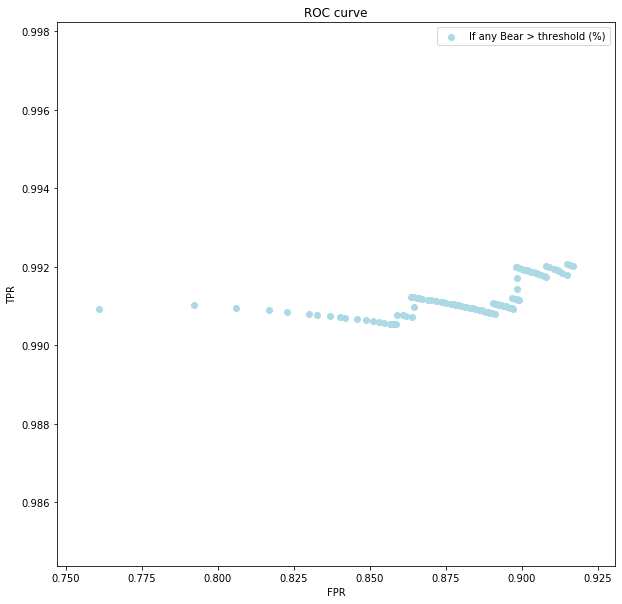

In [92]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
#plt.scatter(FPR_list,TPR_list, c= 'coral', label = 'Mean Bear Accuracy > Threshold')
plt.scatter(FPR_list_any,TPR_list_any, c= 'lightblue', label = 'If any Bear > threshold (%)' )
#plt.scatter(FPR_list,FPR_list, c= 'b', label = 'y = x' )

xlim = [0.4, 0.9]
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve')
ax.legend()



## Correction après coup avec un palier

In [36]:
predictions_scored_threshold = np.array(df_result.groupby('Sequence')[['Accuracy_class_bear']]
            .agg(lissage))

In [311]:
predictions_scored_threshold
predictions_scored_threshold.astype(int)
df_result_scored_th = pd.DataFrame(predictions_scored_threshold, columns = ['Predictions lissees'])
df_result_scored_th['y_true'] = predictions_scored_threshold.astype(int)
df_result_scored_th['Predictions lissees'] = df_result_scored_th['Predictions lissees'].apply(lambda x: int(x))
df_result_scored_th['Predictions lissees'].value_counts()
predictions_scored_threshold = predictions_scored_threshold.astype(int).reshape(4333,)

In [87]:
print(confusion_matrix(y_true_seq, predictions_scored_threshold))

[[  75   51]
 [ 318 3889]]


In [168]:
predictions_scored_threshold = predictions_scored_threshold.astype(int).reshape(4333,)

In [169]:
predictions_scored_threshold

array([0, 0, 0, 0, ..., 1, 1, 1, 1])

In [170]:
diff = predictions_scored_threshold - y_true_seq
diff

nok = [i for i, e in enumerate(diff) if e in [1]]
nok

[23,
 31,
 35,
 36,
 37,
 38,
 40,
 41,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 69,
 82,
 83,
 84,
 86,
 87,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 104,
 107,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 124]

In [172]:
df_result_scored_th['Nb photos par séquence'] = df_result.groupby('Sequence').count()['Path'].values

In [173]:
df_trunc_1 = df_result_scored_th[df_result_scored_th['Nb photos par séquence'] > 1]
df_trunc_1

Predictions lissees  y_true  Nb photos par séquence
0                       0       0                       5
1                       0       0                       5
2                       0       0                       3
3                       0       0                       2
4                       0       0                       5
...                   ...     ...                     ...
4328                    1       1                       5
4329                    1       1                       4
4330                    1       1                       2
4331                    1       1                       2
4332                    1       1                       6

[3911 rows x 3 columns]

# Cas de si on vire les séquences de photos uniques 
le nombre de séquences passe de 4333 à 3911.

In [174]:
df_result_scored_th['Nb photos par séquence'] = df_result.groupby('Sequence').count()['Path'].values

In [175]:
df_result_scored_th

Predictions lissees  y_true  Nb photos par séquence
0                       0       0                       5
1                       0       0                       5
2                       0       0                       3
3                       0       0                       2
4                       0       0                       5
...                   ...     ...                     ...
4328                    1       1                       5
4329                    1       1                       4
4330                    1       1                       2
4331                    1       1                       2
4332                    1       1                       6

[4333 rows x 3 columns]

In [176]:
df_trunc = df_result_scored_th[df_result_scored_th['Nb photos par séquence'] > 1]

In [177]:
df_trunc

Predictions lissees  y_true  Nb photos par séquence
0                       0       0                       5
1                       0       0                       5
2                       0       0                       3
3                       0       0                       2
4                       0       0                       5
...                   ...     ...                     ...
4328                    1       1                       5
4329                    1       1                       4
4330                    1       1                       2
4331                    1       1                       2
4332                    1       1                       6

[3911 rows x 3 columns]

In [178]:
df_trunc['Nb photos par séquence'].unique()

array([  5,   3,   2,  10, ...,  64, 108,  58,  67])

In [179]:
print(confusion_matrix(df_trunc['y_true'], df_trunc['Predictions lissees']))
#sum(df_trunc['y_true'])--> pourquoi le code comprend qu'il doit chercher 500 ours??

[[ 503    0]
 [   0 3408]]


In [ ]:
745+3166

In [ ]:
print(confusion_matrix(y_true_seq, predictions_scored_threshold.astype(int)))